In [1]:
# from opfunu.cec_based.cec2017 import F52017
from mealpy import FloatVar, SA, Tuner     # We will use this Tuner utility
# from mealpy.swarm_based import SA
import numpy as np
from IPython.utils.io import capture_output

In [2]:

def rastrigin(x):
    """
    Rastrigin function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Rastrigin function at the given point.
    """
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

n=5

lb = [-5.12] * n
ub = [5.12] * n

p1 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": rastrigin,
    "minmax": "min",
    "name": "Rastrigin function"
}


In [3]:
def ackley(x):
    """
    Ackley function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Ackley function at the given point.
    """
    a = 20
    b = 0.2
    c = 2 * np.pi

    term1 = -a * np.exp(-b * np.sqrt(np.sum(x**2) / len(x)))
    term2 = -np.exp(np.sum(np.cos(c * x) / len(x)))

    return term1 + term2 + a + np.exp(1)

n=10

lb = [-32.768] * n
ub = [32.768] * n

p2 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": ackley,
    "minmax": "min",
    "name": "Ackley function"
}

In [4]:
def rosenbrock(x):
    """
    Rosenbrock function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Rosenbrock function at the given point.
    """
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

n=20

lb = [-5] * n
ub = [10] * n

p3 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": rosenbrock,
    "minmax": "min",
    "name": "Rosenbrock function"
}

In [5]:
paras_sa_grid = {
    "epoch": [1000],
    "step_size": [5, 4.5, 4, 3.5, 3, 2.5, 2, 1.75, 1.5, 1.25, 1, 0.5, 0.1, 0.01],
    "temp_init": [150, 140, 130, 120, 110, 100, 95, 90, 85, 80, 75, 70],
    #"pop_size": [100],
    # "max_sub_iter": [5,10],
    # "t0": [1000,100,80,50,30],       # from 1 to 100
    # "t1": [1,0.9],                  # from 0.01 to 1
    # "move_count": [5,10],
    # "mutation_rate": [0.1],
    # "mutation_step_size": [0.1],
    # "mutation_step_size_damp": [0.99],
}

term = {
    "max_epoch": 100000,
    "max_time": 60,
    "max_fe": 10000
}

# Start here

In [6]:
prob = p2

# p1 ... "Rastrigin function" - eggholder
# p2 ... "Ackley function" - mountain
# p3 ... "Rosenbrock function" - wave

In [7]:
### Define model and parameter grid of the model (just like ParameterGrid / GridSearchCV)
model = SA.OriginalSA()
tuner = Tuner(model, paras_sa_grid)

In [8]:
with capture_output() as captured:
    ## Get the best model by mean value of all trials
    tuner.execute(problem=prob, n_trials=10, termination=term)

    ## Better to save the tunning results to CSV for later usage
    tuner.export_results()

    ## Also better to draw the figures that are available.
    tuner.export_figures()


print("------------------------------------")
print("------------------------------------")
## Print out the best pameters
print(f"Best parameter: {tuner.best_params}")

## Print out the best score of the best parameter
print(f"Best score: {tuner.best_score}")

## Print out the algorithm with the best parameter
print(f"Best Optimizer: {tuner.best_algorithm}")

------------------------------------
------------------------------------
Best parameter: {'epoch': 1000, 'step_size': 1.25, 'temp_init': 95}
Best score: 20.076388948926105
Best Optimizer: OriginalSA(epoch=1000, temp_init=95, step_size=1.25)


In [9]:
## Print out the best pameters
print(f"Best parameter: {tuner.best_params}")

## Print out the best score of the best parameter
print(f"Best score: {tuner.best_score}")

## Print out the algorithm with the best parameter
print(f"Best Optimizer: {tuner.best_algorithm}")

Best parameter: {'epoch': 1000, 'step_size': 1.25, 'temp_init': 95}
Best score: 20.076388948926105
Best Optimizer: OriginalSA(epoch=1000, temp_init=95, step_size=1.25)


In [10]:
tuner

In [11]:
## Now we can even re-train the algorithm with the best parameter by calling resolve() function 
## Resolve() function will call the solve() function in algorithm with default problem parameter is removed. 
##    other parameters of solve() function is keeped and can be used.

with capture_output() as captured2:
    g_best = tuner.resolve()
print("------------------------------------------------")
print("------------------------------------------------")
print(f"Best solution after re-solve: {g_best.solution}")
print(f"Best fitness after re-solve: {g_best.target.fitness}")

------------------------------------------------
------------------------------------------------
Best solution after re-solve: [-48.13780697 -47.15617554   3.85686825 -27.13398693   3.83394114
  17.03980992  14.1869264  -11.08294543 -38.17649977   7.01664624]
Best fitness after re-solve: 20.68644012009793


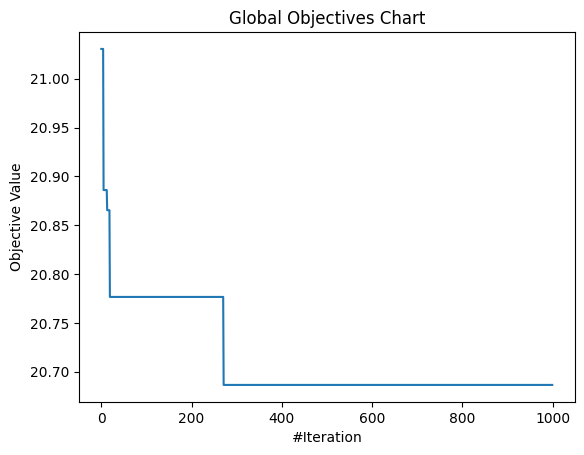

In [12]:
model.history.save_global_objectives_chart(filename="hello/goc")

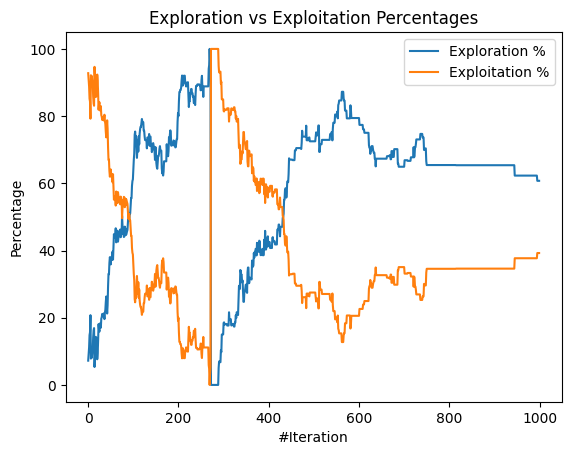

In [13]:
model.history.save_exploration_exploitation_chart(filename="hello/eec")

# Will not run (not working in Python notebook)

In [14]:
# ## Try to run this optimizer on this problem 5 times (n_trials = 5).
# ## Get the best model by mean value of all trials
# ## Distribute to 4 CPU to run (n_jobs=4)
# tuner.execute(problem=p1, termination=term, n_trials=5, n_jobs=4, verbose=True)

# print(tuner.best_row)
# print(tuner.best_score)
# print(tuner.best_params)
# print(type(tuner.best_params))

# print(tuner.best_algorithm)
# ## Better to save the tuning results to CSV for later usage
# tuner.export_results()
# tuner.export_figures()

#     ## Now we can even re-train the algorithm with the best parameter by calling resolve() function
# ## Resolve() function will call the solve() function in algorithm with default problem parameter is removed.
# ##    other parameters of solve() function is keeped and can be used.
# g_best = tuner.resolve(mode="thread", n_workers=4, termination=term)

# ## Print out the best score of the best parameter
# print(g_best.solution, g_best.target.fitness)

# print(tuner.algorithm.problem.get_name())

# ## Print out the algorithm with the best parameter
# print(tuner.best_algorithm.get_name())